In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Titanic.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
null_counts = df.isnull().sum()
print(null_counts)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
df = df.drop(columns=["PassengerId", "Name", "Ticket"])

In [7]:
# Get unique values for each column
unique_values = {}
for column in df.columns:
    unique_values[column] = df[column].unique()

# Print the unique values
for column, values in unique_values.items():
    print(f"Unique values in column '{column}': {values}")

Unique values in column 'Survived': [0 1]
Unique values in column 'Pclass': [3 1 2]
Unique values in column 'Sex': ['male' 'female']
Unique values in column 'Age': [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
Unique values in column 'SibSp': [1 0 3 4 2 5 8]
Unique values in column 'Parch': [0 1 2 5 3 4 6]
Unique values in column 'Fare': [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26. 

In [8]:
sex_mapping = {'male': 1, 'female': 0}
df['Sex'] = df['Sex'].map(sex_mapping)

df.dropna(subset=["Embarked"], inplace=True)
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
df['Embarked'] = df['Embarked'].map(embarked_mapping)

In [9]:
df['Age'].fillna(df['Age'].mode()[0], inplace=True)
df['Cabin'].fillna('U', inplace=True)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [11]:
null_counts = df.isnull().sum()
print(null_counts)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64


In [12]:
df = df.drop(columns=["Cabin"])

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.495519,1,0,-0.500240,0
1,1,1,0,0.720711,1,0,0.788947,1
2,1,3,0,-0.191461,0,0,-0.486650,0
3,1,1,0,0.492668,1,0,0.422861,0
4,0,3,1,0.492668,0,0,-0.484133,0


In [14]:
Y = df['Survived']

X = df.drop(columns = ["Survived"])

X = sm.add_constant(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

In [16]:
model = LogisticRegression()
model.fit(X_train,y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,Y_pred))

Accuracy Score: 0.8277153558052435


In [17]:
#Confusion Matrix
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_mat = confusion_matrix(y_test,Y_pred)
print(confusion_mat)

[[140  26]
 [ 20  81]]


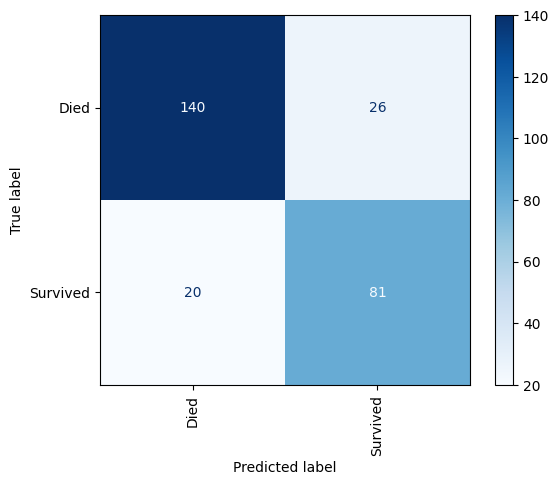

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=['Died', 'Survived'], cmap='Blues', xticks_rotation='vertical' )

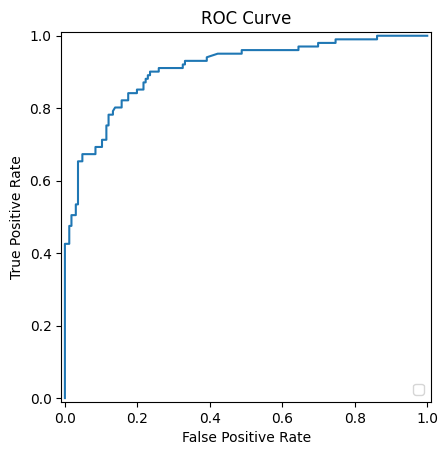

In [19]:
from sklearn.metrics import roc_curve, RocCurveDisplay
y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Create the ROC curve display
disp = RocCurveDisplay(fpr=fpr, tpr=tpr)
disp.plot()

# Add labels and title if desired
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()